
# About the data:

## The data is about hospital patient data.
## The problem statement is: the clinic has gotten several complaints regarding wait times.
 ____________
## -- The requirements are:
### Dose the patient type affect the waiting time?
### Is there a specific type of patient waiting a long time?
### Are we too busy?
### Do we have staffing issues?
### How much the patients wait before the doctor can see them?
### What type of staff do we need or where do we need them?
### What days of the week are affected?
### How can we fix it?

In [1]:
import pandas as pp
import numpy as nn
import plotly.express as px
import plotly.offline as py
template_style = "plotly_dark"
%matplotlib inline

In [2]:
df = pp.read_excel('/kaggle/input/hospital-patient-data/hospital_data_sampleee.xlsx')      #read the file 
df.head(2)

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Patient ID
0,2019-11-04,1183.22,10,20.17,ANCHOR,HMO,OUTPATIENT,08:35:45,09:17:54,09:29:46,C10001
1,2019-11-06,738.48,$-,15,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,C10002


## EDA/CLEANING

In [3]:
df.info()       #the information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29998 entries, 0 to 29997
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    29998 non-null  datetime64[ns]
 1    Medication Revenue     29998 non-null  object        
 2     Lab Cost              29998 non-null  object        
 3    Consultation Revenue   29998 non-null  object        
 4   Doctor Type             29998 non-null  object        
 5   Financial Class         29998 non-null  object        
 6   Patient Type            29998 non-null  object        
 7   Entry Time              29998 non-null  object        
 8   Post-Consultation Time  29998 non-null  object        
 9   Completion Time         29998 non-null  object        
 10  Patient ID              29998 non-null  object        
dtypes: datetime64[ns](1), object(10)
memory usage: 2.5+ MB


In [4]:
df.shape

(29998, 11)

In [5]:
df.duplicated().sum()           #Is there any duplicated values?

0

In [6]:
df.isnull().sum().sort_values(ascending=False)          #is there any NULL values?

Date                      0
 Medication Revenue       0
  Lab Cost                0
 Consultation Revenue     0
Doctor Type               0
Financial Class           0
Patient Type              0
Entry Time                0
Post-Consultation Time    0
Completion Time           0
Patient ID                0
dtype: int64

In [7]:
df.nunique()

Date                         13
 Medication Revenue        4280
  Lab Cost                  200
 Consultation Revenue       241
Doctor Type                   3
Financial Class               5
Patient Type                  1
Entry Time                20628
Post-Consultation Time    21356
Completion Time           21384
Patient ID                29998
dtype: int64

In [8]:
df_copy = df.copy()         # always make sure u keep a copy

In [9]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("-","_" )       ## change the names forms

In [10]:
df.head()

,date,medication_revenue,lab_cost,consultation_revenue,doctor_type,financial_class,patient_type,entry_time,post_consultation_time,completion_time,patient_id
0,2019-11-04,1183.22,10,20.17,ANCHOR,HMO,OUTPATIENT,08:35:45,09:17:54,09:29:46,C10001
1,2019-11-06,738.48,$-,15,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,C10002
2,2019-11-02,660,$-,21.17,ANCHOR,HMO,OUTPATIENT,10:46:52,11:56:25,12:06:28,C10003
3,2019-11-06,600,$-,$-,ANCHOR,MEDICARE,OUTPATIENT,09:38:34,10:55:50,10:58:02,C10004
4,2019-11-01,591.6,$-,12,ANCHOR,INSURANCE,OUTPATIENT,11:16:21,12:06:49,12:06:54,C10005


### let's look at every single columns

In [11]:
df.date.value_counts().sort_index()

2019-11-01    2518
2019-11-02    1471
2019-11-03    1301
2019-11-04    3365
2019-11-05    2798
2019-11-06    2813
2019-11-07    2673
2019-11-08    2405
2019-11-09    1539
2019-11-10    1248
2019-11-11    3617
2019-11-12    2892
2019-11-13    1358
Name: date, dtype: int64

In [12]:
df.medication_revenue.value_counts()

 $-       11936
7.48        149
5           129
17          126
8.5         118
          ...  
56.62         1
56.6          1
56.52         1
56.5          1
41.34         1
Name: medication_revenue, Length: 4280, dtype: int64

In [13]:
df.lab_cost.value_counts()

 $-       28565
10          191
8           138
28.04        96
15           90
          ...  
37            1
48.15         1
107           1
101           1
9.5           1
Name: lab_cost, Length: 200, dtype: int64

In [14]:
df.consultation_revenue.value_counts()

 $-       5576
13        4762
12        3158
15        2509
24.3      1033
          ... 
23.36        1
52           1
35.13        1
17.76        1
14.5         1
Name: consultation_revenue, Length: 241, dtype: int64

In [15]:
df.doctor_type.value_counts()

ANCHOR      21913
LOCUM        6789
FLOATING     1296
Name: doctor_type, dtype: int64

In [16]:
df.financial_class.value_counts()

INSURANCE    9931
PRIVATE      9121
CORPORATE    6915
HMO          3738
MEDICARE      293
Name: financial_class, dtype: int64

In [17]:
df.patient_type.value_counts()

OUTPATIENT    29998
Name: patient_type, dtype: int64

In [18]:
df.entry_time.value_counts()

18:07:47    9
18:02:40    7
10:29:55    7
08:39:21    7
10:59:54    7
           ..
18:53:26    1
14:23:33    1
16:08:18    1
16:29:46    1
13:58:57    1
Name: entry_time, Length: 20628, dtype: int64

In [19]:
df.post_consultation_time.value_counts()

11:44:23    6
10:32:26    6
11:04:16    6
11:45:35    6
11:11:20    6
           ..
21:05:23    1
13:09:24    1
14:19:54    1
18:40:57    1
14:13:21    1
Name: post_consultation_time, Length: 21356, dtype: int64

In [20]:
df.completion_time.value_counts()

10:04:33    7
10:12:54    7
10:20:45    6
10:04:23    6
09:51:23    6
           ..
18:38:03    1
11:31:34    1
12:55:16    1
09:02:37    1
14:19:02    1
Name: completion_time, Length: 21384, dtype: int64

In [21]:
df.patient_id.value_counts()

C10001    1
C29995    1
C30007    1
C30006    1
C30005    1
         ..
C19996    1
C19995    1
C19994    1
C19993    1
C39999    1
Name: patient_id, Length: 29998, dtype: int64

### (EDA)

In [22]:
df.dtypes

date                      datetime64[ns]
medication_revenue                object
lab_cost                          object
consultation_revenue              object
doctor_type                       object
financial_class                   object
patient_type                      object
entry_time                        object
post_consultation_time            object
completion_time                   object
patient_id                        object
dtype: object

### We don't have the data for patient time waiting, so let's add the timing by sub 'entry time' - 'completion time'

### We cant sub two dates.time so we need to change 'entry_time' , 'post_consultation_time' , 'completion_time' to_timedelta

In [23]:
df.completion_time = pp.to_timedelta(df.completion_time.astype(str))
df.entry_time = pp.to_timedelta(df.entry_time.astype(str))
df.post_consultation_time = pp.to_timedelta(df.post_consultation_time.astype(str))

In [24]:
df.dtypes

date                       datetime64[ns]
medication_revenue                 object
lab_cost                           object
consultation_revenue               object
doctor_type                        object
financial_class                    object
patient_type                       object
entry_time                timedelta64[ns]
post_consultation_time    timedelta64[ns]
completion_time           timedelta64[ns]
patient_id                         object
dtype: object

In [25]:
df

,date,medication_revenue,lab_cost,consultation_revenue,doctor_type,financial_class,patient_type,entry_time,post_consultation_time,completion_time,patient_id
0,2019-11-04,1183.22,10,20.17,ANCHOR,HMO,OUTPATIENT,0 days 08:35:45,0 days 09:17:54,0 days 09:29:46,C10001
1,2019-11-06,738.48,$-,15,ANCHOR,INSURANCE,OUTPATIENT,0 days 19:19:16,0 days 21:02:36,0 days 21:24:07,C10002
2,2019-11-02,660,$-,21.17,ANCHOR,HMO,OUTPATIENT,0 days 10:46:52,0 days 11:56:25,0 days 12:06:28,C10003
3,2019-11-06,600,$-,$-,ANCHOR,MEDICARE,OUTPATIENT,0 days 09:38:34,0 days 10:55:50,0 days 10:58:02,C10004
4,2019-11-01,591.6,$-,12,ANCHOR,INSURANCE,OUTPATIENT,0 days 11:16:21,0 days 12:06:49,0 days 12:06:54,C10005
...,...,...,...,...,...,...,...,...,...,...,...
29993,2019-11-13,$-,$-,$-,ANCHOR,PRIVATE,OUTPATIENT,0 days 14:01:24,0 days 14:08:56,0 days 14:15:42,C39995
29994,2019-11-13,$-,$-,$-,ANCHOR,PRIVATE,OUTPATIENT,0 days 14:01:33,0 days 14:21:17,0 days 14:21:53,C39996
29995,2019-11-13,$-,$-,$-,ANCHOR,PRIVATE,OUTPATIENT,0 days 14:01:41,0 days 14:13:57,0 days 14:16:29,C39997
29996,2019-11-13,$-,$-,$-,LOCUM,CORPORATE,OUTPATIENT,0 days 14:01:42,0 days 14:13:21,0 days 14:13:22,C39998


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29998 entries, 0 to 29997
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   date                    29998 non-null  datetime64[ns] 
 1   medication_revenue      29998 non-null  object         
 2   lab_cost                29998 non-null  object         
 3   consultation_revenue    29998 non-null  object         
 4   doctor_type             29998 non-null  object         
 5   financial_class         29998 non-null  object         
 6   patient_type            29998 non-null  object         
 7   entry_time              29998 non-null  timedelta64[ns]
 8   post_consultation_time  29998 non-null  timedelta64[ns]
 9   completion_time         29998 non-null  timedelta64[ns]
 10  patient_id              29998 non-null  object         
dtypes: datetime64[ns](1), object(7), timedelta64[ns](3)
memory usage: 2.5+ MB


In [27]:
df.head(2)

,date,medication_revenue,lab_cost,consultation_revenue,doctor_type,financial_class,patient_type,entry_time,post_consultation_time,completion_time,patient_id
0,2019-11-04,1183.22,10,20.17,ANCHOR,HMO,OUTPATIENT,0 days 08:35:45,0 days 09:17:54,0 days 09:29:46,C10001
1,2019-11-06,738.48,$-,15,ANCHOR,INSURANCE,OUTPATIENT,0 days 19:19:16,0 days 21:02:36,0 days 21:24:07,C10002


#### just ignore the 0 days

### We just need the 'waiting_time', but ill add some more to make it easy for me

In [28]:
df['waiting_time'] = df['completion_time'] - df['entry_time']  # new column for Calculator 'waiting_time'
###
df['waiting_ber_munets'] = df.waiting_time.dt.seconds / 60     # new column for Calculator 'waiting_ber_munets'
df['waiting_ber_munets'] = df['waiting_ber_munets'].round(0)
####
df['weekday'] = df.date.dt.strftime('%A')                      # new column for extract 'weekday' from 'date'
df['hours'] = df.entry_time.dt.components.hours                # new column for extract the  'hours' from 'entry_time'
df.head()

,date,medication_revenue,lab_cost,consultation_revenue,doctor_type,financial_class,patient_type,entry_time,post_consultation_time,completion_time,patient_id,waiting_time,waiting_ber_munets,weekday,hours
0,2019-11-04,1183.22,10,20.17,ANCHOR,HMO,OUTPATIENT,0 days 08:35:45,0 days 09:17:54,0 days 09:29:46,C10001,0 days 00:54:01,54.0,Monday,8
1,2019-11-06,738.48,$-,15,ANCHOR,INSURANCE,OUTPATIENT,0 days 19:19:16,0 days 21:02:36,0 days 21:24:07,C10002,0 days 02:04:51,125.0,Wednesday,19
2,2019-11-02,660,$-,21.17,ANCHOR,HMO,OUTPATIENT,0 days 10:46:52,0 days 11:56:25,0 days 12:06:28,C10003,0 days 01:19:36,80.0,Saturday,10
3,2019-11-06,600,$-,$-,ANCHOR,MEDICARE,OUTPATIENT,0 days 09:38:34,0 days 10:55:50,0 days 10:58:02,C10004,0 days 01:19:28,79.0,Wednesday,9
4,2019-11-01,591.6,$-,12,ANCHOR,INSURANCE,OUTPATIENT,0 days 11:16:21,0 days 12:06:49,0 days 12:06:54,C10005,0 days 00:50:33,51.0,Friday,11


### The first thing they want to know is: Dose the patient type affect the waiting time? , And is there a specific type of patients waiting a long time?

In [29]:
df.patient_type.value_counts()          #checking the values of 'patient_type'

OUTPATIENT    29998
Name: patient_type, dtype: int64

In [30]:
df.financial_class.value_counts()

INSURANCE    9931
PRIVATE      9121
CORPORATE    6915
HMO          3738
MEDICARE      293
Name: financial_class, dtype: int64

### We just have one type of patient in the 'patient_type', but if we can use 'financial_class' I think we can answer the Q

#### And we will do the same for 'Weekday' later (the second Q) , so let's build a function for Groupby

In [31]:

# Groupby as a function
def grouped_data(column_name):
    '''
    Groupby column and return DataFrame
    Input: Column Name
    '''
    df_tmp = df.groupby(column_name)[['waiting_ber_munets']].mean().round(0)
    df_tmp2 = df[column_name].value_counts()      #this for concat
    
    pivot_F = pp.concat([df_tmp, df_tmp2.rename('number_of_patient')],axis=1)
    pivot_F.reset_index(inplace=True)
    pivot_F = pivot_F.rename(columns={'index': column_name })
    return pivot_F
    
answer1 =  grouped_data('financial_class')
answer2 =  grouped_data('weekday')
print(answer1 , answer2)              #checking


  financial_class  waiting_ber_munets  number_of_patient
0       CORPORATE                46.0               6915
1             HMO                46.0               3738
2       INSURANCE                44.0               9931
3        MEDICARE                58.0                293
4         PRIVATE                40.0               9121      weekday  waiting_ber_munets  number_of_patient
0     Friday                42.0               4923
1     Monday                49.0               6982
2   Saturday                43.0               3010
3     Sunday                33.0               2549
4   Thursday                42.0               2673
5    Tuesday                42.0               5690
6  Wednesday                47.0               4171


In [32]:
fig = px.pie(answer1, values='number_of_patient', 
             names= 'financial_class' , hole=0.6 , width=600,height=600 , 
             template=template_style ,
             hover_data=['waiting_ber_munets'], 
             labels={'waiting_ber_munets':'the waiting time per m'})
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()
# py.offline.plot(fig, filename='{}.html'.format(r"C:\" File Path "\\"),
#                 auto_open=False, image_width=1600,
#                         image_height=900)                     #import the plot to html file

In [13]:
# Perform Kendall correlation analysis
correlation_matrix = df_copy.corr(method='kendall')

# Display the correlation matrix
print(correlation_matrix)

                      medication_revenue  lab_cost  consultation_revenue  \
medication_revenue              1.000000  0.632456              0.400000   
lab_cost                        0.632456  1.000000              0.316228   
consultation_revenue            0.400000  0.316228              1.000000   
waiting_ber_munets              0.400000 -0.316228              0.200000   
consultation_period             0.000000 -0.632456             -0.200000   
process_period                  0.800000  0.316228              0.200000   
consultation_perc              -1.000000 -0.632456             -0.400000   
process_perc                    1.000000  0.632456              0.400000   

                      waiting_ber_munets  consultation_period  process_period  \
medication_revenue              0.400000             0.000000        0.800000   
lab_cost                       -0.316228            -0.632456        0.316228   
consultation_revenue            0.200000            -0.200000        0.2

## So the Q was: Dose the patient type affect the waiting time?

#### We can see that : 
#### - The 'INSURANCE' type of patient is (33.1%) of our patients and they are (9931 patients) and they waiting (44 min ) on average. 
#### - The 'PRIVATE' type of patient is (30.4%) of our patients and they are (9121 patients) and they waiting (40 min ) on average. 
#### - The 'CORPORATE' type of patient is (23.1%) of our patients and they are (6915 patients) and they wait (46 min ) on average. 
#### - The 'HMO' type of patient is (12.5%) of our patients and they are (3738 patients) and they waiting (46 min ) on average. 
#### - The 'MEDICARE' type of patient is (1%) of our patients and they are (293 patients) and they waiting (58 min ) on average. 

#### SO No the patient type does not give that big effect on the waiting time, BUT if you 'MEDICARE' type of patient your chance to wait long is higher.

_________________________________________

## Is there a specific type of patient waiting a long time?

#### Yes there is a specific type of patient waiting a long time, and that type is MEDICARE and they wait (58 min) on average.

___________________________________________________________________

## Are we too busy?
#### I'll do daily and hourly visualization to answer the Q, and build two heatmaps one for 'wait time' and the second for 'the number of patients, so lets make a function to make it easy

In [33]:
def grouped_data2(column_name):
    if column_name == 'completion_time':                                            # if column_name == 'completion_time' do the following
        answer = pp.pivot_table(df, index='hours',                                  # make a pivot_table and aggfunc 'count'
                                columns=['weekday'], aggfunc= 'count')
        answer.drop(answer.iloc[: , 7:], axis=1, inplace=True)                      # Drop the columns [: , 7:]
    elif column_name == 'waiting_ber_munets':                                       # if column_name == 'waiting_ber_munets' do the following
        answer = pp.pivot_table(df, index='hours',                                  # make a pivot_table and aggfunc 'mean'
                                columns=['weekday'] , aggfunc= 'mean').round(1)  
    else:
        return(column_name + " is not in the columns")                              # if the giving value is else print this statment
    
    answer = answer[column_name]
    answer = answer.fillna(0)
    answer = answer[['Sunday', 'Monday', 'Tuesday',                                 # sorting
                  'Wednesday', 'Thursday', 
                  'Friday', 'Saturday']] 
    return answer
answer3 =  grouped_data2('completion_time')
answer4 =  grouped_data2('waiting_ber_munets')
print(answer3,answer4)      #checking

weekday  Sunday  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday
hours                                                                  
7           1.0     0.0      4.0        5.0       1.0     0.0       1.0
8         269.0   768.0    639.0      554.0     295.0   546.0     418.0
9         398.0   930.0    735.0      709.0     357.0   607.0     561.0
10        421.0   775.0    571.0      641.0     241.0   511.0     520.0
11        390.0   644.0    546.0      499.0     254.0   537.0     436.0
12        184.0   270.0    236.0      235.0     108.0   225.0     188.0
13         55.0   101.0     76.0       66.0      30.0    68.0      30.0
14        113.0   825.0    687.0      384.0     286.0   596.0     139.0
15         97.0   491.0    392.0      203.0     181.0   381.0     102.0
16         58.0   349.0    257.0      135.0     155.0   245.0      50.0
17         14.0    55.0     55.0       12.0      21.0    47.0      15.0
18        179.0   730.0    531.0      293.0     286.0   423.0   

In [34]:
fig3 = px.imshow(answer3,
                labels=dict(x="weekday", y="hours", color="number of paitant") , 
                aspect="auto", color_continuous_scale='tempo',
                template = template_style, title="Daily/hourly visualization",
                text_auto=True, width=700, height=700)
fig3.update_xaxes(side="top")
fig3.show()

#### I assumed that the highest number of patients = the longest wait time.
#### I noticed that there are times in the day when the number of patients is low, and these times are: (7 hour) and (13 hour) and (17 hour) and (21, and after)

In [35]:
fig4 = px.imshow(answer4,
                labels=dict(x="weekday", y="hours",
                            color="the waiting time per min") , 
                            aspect="auto", color_continuous_scale='tempo',
                            template = template_style,
                            text_auto=True, width=700, height=700)
fig4.update_xaxes(side="top")
fig4.show()

### Yes, we are too busy in the morning period and at 13 hour
#### In the first heatMap I thoughts it will be less wait time for patients at 7, 13, 17, 21, 22, and 23, But here I found that the rushed time for waiting started at 7 on(Tuesday, Wednesday, Thursday, Saturday) and reach the peak at 9, and decrease after, and start increasing at 13 and decreased after, and increased at 17 Until 20 after that it's decreasing, that means we are short in staff, but im curious about the 7 hour, why the wait time is hghi?

In [36]:
def morining(colmun_n):
    ddf = df[['entry_time' , 'post_consultation_time' , 'completion_time' , 'waiting_ber_munets']].sort_values(by= colmun_n ).head(10)
    return ddf

In [37]:
morining('entry_time').head(2)

,entry_time,post_consultation_time,completion_time,waiting_ber_munets
570,0 days 07:53:25,0 days 08:29:46,0 days 08:49:16,56.0
22590,0 days 07:55:06,0 days 08:22:58,0 days 08:31:59,37.0


#### It seems that the patients enter after 7:50 so maybe the clinic(OUTPATIENT) Starts at 8:00 

In [38]:
morining('post_consultation_time').head(2)

,entry_time,post_consultation_time,completion_time,waiting_ber_munets
26482,0 days 07:58:59,0 days 08:07:41,0 days 08:07:57,9.0
26483,0 days 08:02:59,0 days 08:08:34,0 days 08:11:32,9.0


#### it seems that im right the(OUTPATIENT) started at 8:07

### I'll build another chart to make sure that we are having a staff issue and nothing else

In [39]:
answer5 = grouped_data('hours')
link_size = [3,6]
fig = px.bar(x=answer5['hours'],
             y=answer5['waiting_ber_munets'],
             template= template_style,
             text_auto='.2s',
             labels={'x':'the hour',
                     'y':'the waiting time per m'}
             ).add_traces(
      px.line(answer5, x=answer5['hours'], text='number_of_patient',
             y=answer5['number_of_patient'],markers=True).update_traces(yaxis="y2",
             showlegend=True, line=dict(color = 'red', width=link_size[1]), name="number_of_patient").data)        
fig.update_layout(yaxis2={"side":"right", "overlaying":"y"})
fig.show()


#### Now we can see that (13 and 17) have an average wait time even though we have a lower amount of patients, so Yes it's a staffing issue

## So how can we fix this issue?
#### increasing our staffing at these hours (8 and 9,13 and 14,18) hours 

## What type of staff we need or where do we need them?

### Let's break this down, we have 4 types of timing in the data,
#### entry_time = entered the (OUTPATIENT)
#### post_consultation_time = when the doctor tells the patients to enter the clinic room
#### completion_time = when the patients exit the clinic room or the building
#### waiting_time = the entire wait time spend in the hospital
__________
we can extract more info from these like.
#### consultation_period = before entering to the doctor
#### process_period = talking to the doctor
#### consultation_perc = the % of time spend in consultation_period
#### process_perc = is the rest of the % of the consultation_perc time

In [40]:
df['consultation_period'] = df.post_consultation_time - df.entry_time
df['consultation_period'] = df.consultation_period.dt.seconds / 60          
df['consultation_period'] = df['consultation_period'].round(2)
# consultation_period = the amount of time after entr the (OUTPATIENT) and before the doctor see the patient

df['process_period'] = df.completion_time - df.post_consultation_time
df['process_period'] = df.process_period.dt.seconds / 60                     
df['process_period'] = df['process_period'].round(2)
# process_period = the amount of time the patients talking to the doctort + exite the (OUTPATIENT)

df['consultation_perc'] = df.consultation_period / df.waiting_ber_munets
df['consultation_perc'] = df['consultation_perc'].round(2)
# consultation_perc = the % of time spend in consultation_period

df['process_perc'] = 1 - df.consultation_perc
# process_perc = is the rest of the % of the consultation_perc time
df.head(1)

,date,medication_revenue,lab_cost,consultation_revenue,doctor_type,financial_class,patient_type,entry_time,post_consultation_time,completion_time,patient_id,waiting_time,waiting_ber_munets,weekday,hours,consultation_period,process_period,consultation_perc,process_perc
0,2019-11-04,1183.22,10,20.17,ANCHOR,HMO,OUTPATIENT,0 days 08:35:45,0 days 09:17:54,0 days 09:29:46,C10001,0 days 00:54:01,54.0,Monday,8,42.15,11.87,0.78,0.22


# How much the patients wait before the doctor can see them?

In [41]:
df.consultation_period.mean()

38.914371958130545

### The patients wait before the doctor can see them 38min in average

In [42]:
answer6 = df[['consultation_perc', 'process_perc']].mean()
periods = df[[ 'consultation_period', 'process_period']].mean().round(0)
print(answer6)

consultation_perc    0.882414
process_perc         0.117586
dtype: float64


In [43]:
fig = px.pie(answer6 , names= answer6.index, 
             template=template_style, 
             values= answer6,
             hover_name= periods.index,
             color=periods,
             labels={'color':'the waiting time per m '
                     })
fig.update_traces(textposition='outside',
                  textinfo='percent+label')
fig.show()

#### soo 88% of our patient time is gone for consultation_period whats means our patients spend 88% (average 39 min)of their time waiting for the doctor and spend just 11% talking to the doctor.

### as we can see the time to wait to see the doctor is limited by the number of doctors.

### The next Q was, What days of week are affected?

In [44]:
# Create Chart for the Daily
fig2 = px.bar(answer2,
             x='weekday',
             y='number_of_patient',
             color='waiting_ber_munets',
             labels={'waiting_ber_munets':'the waiting time per m'} ,
             color_continuous_scale=['green','yellow','red'],
             template = template_style,
             title = '<b>Daily visualization</b>')
# Display Plot
fig2.show()

##  To ansowe the Q, the affected day is Monday and Wednesday.
#### 'Monday' has a lot of patients(6982) and waiting time(49 min) (correlated)
#### 'Wednesday' has the average number of patients(4171) but high waiting time(47 min ) (not correlated)

# Summary: 
### There may be a possibility to add more medical staff during these times ((8 and 9,13 and 14,18) of the days), and focus on Monday and Wednesday.

# Actions:
### Determine if it makes financial sense to have an additional medical staffing at these times in summary section .

# Model Training


medication_revenue                float64
lab_cost                          float64
consultation_revenue              float64
waiting_ber_munets                float64
hours                               int64
entry_time_seconds                float64
post_consultation_time_seconds    float64
completion_time_seconds           float64
doctor_type_FLOATING                uint8
doctor_type_LOCUM                   uint8
financial_class_HMO                 uint8
financial_class_INSURANCE           uint8
financial_class_MEDICARE            uint8
financial_class_PRIVATE             uint8
weekday_Monday                      uint8
weekday_Saturday                    uint8
weekday_Sunday                      uint8
weekday_Thursday                    uint8
weekday_Tuesday                     uint8
weekday_Wednesday                   uint8
dtype: object
Train MSE: 1323.3401517251439
Test MSE: 8731.95746705
Train R2: 0.9923334215060378
Test R2: 0.9493449957266636
Train MAE: 10.581893907825652
Test 

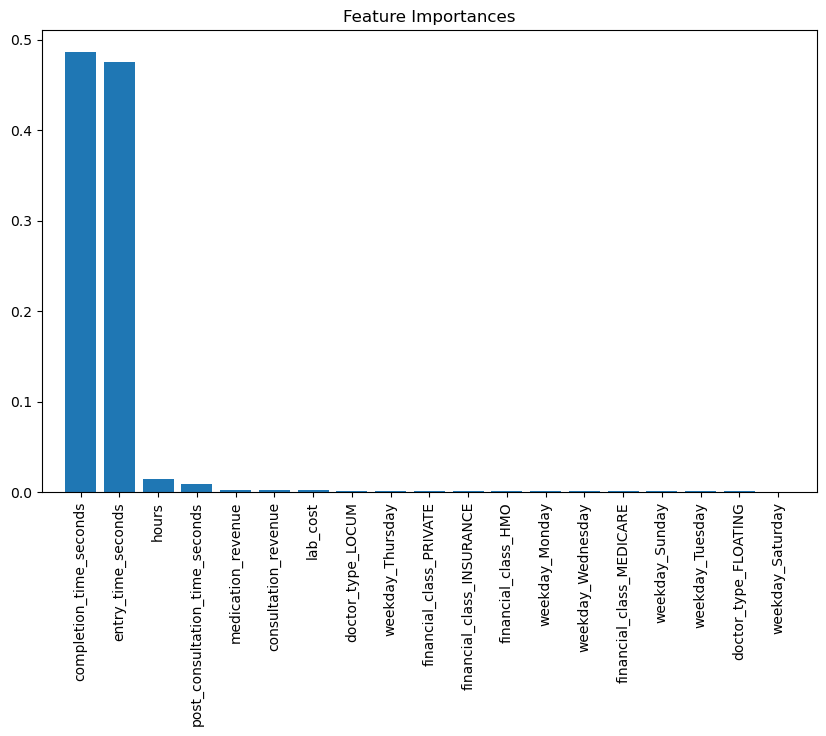

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Sample creation of the df DataFrame for testing
data = {
    'date': pd.date_range(start='2019-11-01', periods=29998, freq='H'),
    'medication_revenue': np.random.choice(['1183.22', '738.48', '660', '600', '591.6', '$-'], 29998),
    'lab_cost': np.random.choice(['10', '$-', '28.04', '15', '48.15'], 29998),
    'consultation_revenue': np.random.choice(['20.17', '15', '21.17', '$-', '12'], 29998),
    'doctor_type': np.random.choice(['ANCHOR', 'LOCUM', 'FLOATING'], 29998),
    'financial_class': np.random.choice(['HMO', 'INSURANCE', 'MEDICARE', 'PRIVATE', 'CORPORATE'], 29998),
    'patient_type': ['OUTPATIENT'] * 29998,
    'entry_time': pd.to_timedelta(np.random.randint(0, 86400, size=29998), unit='s'),
    'post_consultation_time': pd.to_timedelta(np.random.randint(0, 86400, size=29998), unit='s'),
    'completion_time': pd.to_timedelta(np.random.randint(0, 86400, size=29998), unit='s'),
    'patient_id': ['C' + str(i) for i in range(10001, 39999)]
}
df = pd.DataFrame(data)

# Assuming you already have the following preprocessing steps:
df['medication_revenue'] = pd.to_numeric(df['medication_revenue'].replace('$-', '0').replace('$', '').str.strip())
df['lab_cost'] = pd.to_numeric(df['lab_cost'].replace('$-', '0').replace('$', '').str.strip())
df['consultation_revenue'] = pd.to_numeric(df['consultation_revenue'].replace('$-', '0').replace('$', '').str.strip())

# Add derived columns as described
df['waiting_time'] = df['completion_time'] - df['entry_time']
df['waiting_ber_munets'] = df['waiting_time'].dt.seconds / 60
df['waiting_ber_munets'] = df['waiting_ber_munets'].round(0)
df['weekday'] = df['date'].dt.strftime('%A')
df['hours'] = df['entry_time'].dt.components.hours

# Convert timedelta features to total seconds
df['entry_time_seconds'] = df['entry_time'].dt.total_seconds()
df['post_consultation_time_seconds'] = df['post_consultation_time'].dt.total_seconds()
df['completion_time_seconds'] = df['completion_time'].dt.total_seconds()

# Drop unnecessary columns
df = df.drop(columns=['patient_id', 'patient_type', 'entry_time', 'post_consultation_time', 'completion_time', 'waiting_time', 'date'])

# Encode categorical variables
df = pd.get_dummies(df, columns=['doctor_type', 'financial_class', 'weekday'], drop_first=True)

# Ensure all columns are numeric
print(df.dtypes)

# Split the data
X = df.drop(columns=['waiting_ber_munets'])
y = df['waiting_ber_munets']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Train R2: {train_r2}')
print(f'Test R2: {test_r2}')
print(f'Train MAE: {train_mae}')
print(f'Test MAE: {test_mae}')

# Feature Importance
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


In [14]:
df.describe()

,medication_revenue,lab_cost,consultation_revenue,waiting_ber_munets,hours,entry_time_seconds,post_consultation_time_seconds,completion_time_seconds,doctor_type_FLOATING,doctor_type_LOCUM,financial_class_HMO,financial_class_INSURANCE,financial_class_MEDICARE,financial_class_PRIVATE,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
count,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000
mean,629.738423,20.229914,13.698492,717.069705,11.552037,43379.054970,43306.784452,43217.617408,0.332055,0.336989,0.200213,0.201013,0.198013,0.201113,0.143143,0.143210,0.143210,0.142409,0.142409,0.142409
std,347.083183,16.645736,7.569569,415.435810,6.945255,25030.301256,24859.119552,24865.182159,0.470959,0.472689,0.400167,0.400765,0.398509,0.400839,0.350224,0.350292,0.350292,0.349475,0.349475,0.349475
min,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,591.600000,10.000000,12.000000,359.000000,6.000000,21645.500000,22033.000000,21826.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,660.000000,15.000000,15.000000,712.000000,12.000000,43468.500000,43236.000000,43173.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,738.480000,28.040000,20.170000,1079.000000,18.000000,65125.250000,65014.500000,64811.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1183.220000,48.150000,21.170000,1440.000000,23.000000,86397.000000,86399.000000,86398.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Evaluate the best model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Train R2: {train_r2}')
print(f'Test R2: {test_r2}')
print(f'Train MAE: {train_mae}')
print(f'Test MAE: {test_mae}')


Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   9.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  17.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  26.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  26.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   8.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  17.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   8.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   2.6s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   2.9s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   2.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   4.8s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.7; total time=   7.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.9; tot

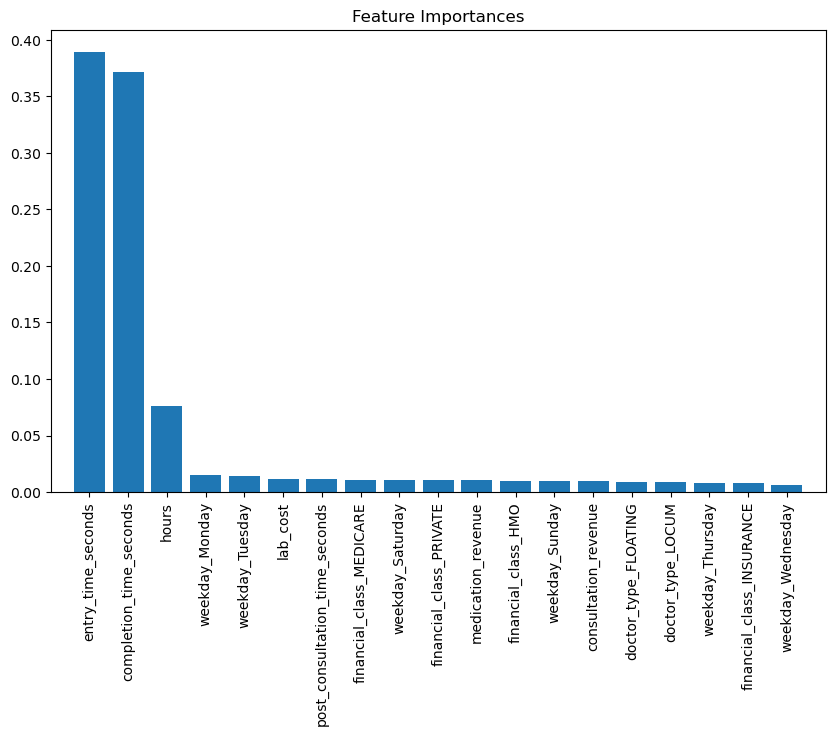


[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.9; total time=   4.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   8.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   8.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.7; total time=  12.7s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.8; total time=  12.0s

[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.8; total time=   8.3s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import xgboost as xgb

# Sample creation of the df DataFrame for testing
data = {
    'date': pd.date_range(start='2019-11-01', periods=29998, freq='H'),
    'medication_revenue': np.random.choice(['1183.22', '738.48', '660', '600', '591.6', '$-'], 29998),
    'lab_cost': np.random.choice(['10', '$-', '28.04', '15', '48.15'], 29998),
    'consultation_revenue': np.random.choice(['20.17', '15', '21.17', '$-', '12'], 29998),
    'doctor_type': np.random.choice(['ANCHOR', 'LOCUM', 'FLOATING'], 29998),
    'financial_class': np.random.choice(['HMO', 'INSURANCE', 'MEDICARE', 'PRIVATE', 'CORPORATE'], 29998),
    'patient_type': ['OUTPATIENT'] * 29998,
    'entry_time': pd.to_timedelta(np.random.randint(0, 86400, size=29998), unit='s'),
    'post_consultation_time': pd.to_timedelta(np.random.randint(0, 86400, size=29998), unit='s'),
    'completion_time': pd.to_timedelta(np.random.randint(0, 86400, size=29998), unit='s'),
    'patient_id': ['C' + str(i) for i in range(10001, 39999)]
}
df = pd.DataFrame(data)

# Assuming you already have the following preprocessing steps:
df['medication_revenue'] = pd.to_numeric(df['medication_revenue'].replace('$-', '0').replace('$', '').str.strip())
df['lab_cost'] = pd.to_numeric(df['lab_cost'].replace('$-', '0').replace('$', '').str.strip())
df['consultation_revenue'] = pd.to_numeric(df['consultation_revenue'].replace('$-', '0').replace('$', '').str.strip())

# Add derived columns as described
df['waiting_time'] = df['completion_time'] - df['entry_time']
df['waiting_ber_munets'] = df['waiting_time'].dt.seconds / 60
df['waiting_ber_munets'] = df['waiting_ber_munets'].round(0)
df['weekday'] = df['date'].dt.strftime('%A')
df['hours'] = df['entry_time'].dt.components.hours

# Convert timedelta features to total seconds
df['entry_time_seconds'] = df['entry_time'].dt.total_seconds()
df['post_consultation_time_seconds'] = df['post_consultation_time'].dt.total_seconds()
df['completion_time_seconds'] = df['completion_time'].dt.total_seconds()

# Drop unnecessary columns
df = df.drop(columns=['patient_id', 'patient_type', 'entry_time', 'post_consultation_time', 'completion_time', 'waiting_time', 'date'])

# Encode categorical variables
df = pd.get_dummies(df, columns=['doctor_type', 'financial_class', 'weekday'], drop_first=True)

# Split the data
X = df.drop(columns=['waiting_ber_munets'])
y = df['waiting_ber_munets']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Instantiate the XGBoost model
xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=xgbr, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Evaluate the best model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Train R2: {train_r2}')
print(f'Test R2: {test_r2}')
print(f'Train MAE: {train_mae}')
print(f'Test MAE: {test_mae}')

# Feature Importance
importances = best_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


Fitting 3 folds for each of 60 candidates, totalling 180 fits
Best parameters: {'depth': 10, 'iterations': 1000, 'l2_leaf_reg': 5, 'learning_rate': 0.1}
Best cross-validation score: 0.9284112992207204
Train MSE: 1937.8577544253512
Test MSE: 12156.480161991902
Train R2: 0.9888977015845357
Test R2: 0.9296105805000675
Train MAE: 20.41038544118056
Test MAE: 39.092688202865645


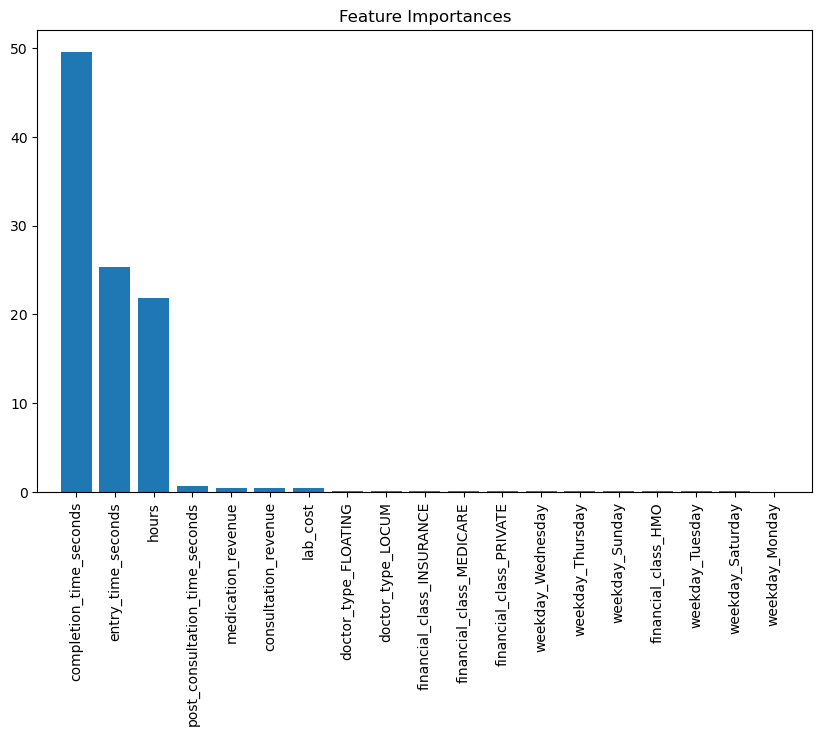

[CV] END depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.01; total time=  10.1s
[CV] END depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.01; total time=   9.1s
[CV] END depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.1; total time=  11.4s
[CV] END depth=6, iterations=500, l2_leaf_reg=5, learning_rate=0.01; total time=   9.2s
[CV] END depth=6, iterations=500, l2_leaf_reg=5, learning_rate=0.1; total time=   9.8s
[CV] END depth=6, iterations=500, l2_leaf_reg=7, learning_rate=0.1; total time=   9.0s
[CV] END depth=6, iterations=500, l2_leaf_reg=9, learning_rate=0.01; total time=  10.8s
[CV] END depth=6, iterations=500, l2_leaf_reg=9, learning_rate=0.1; total time=   8.3s
[CV] END depth=6, iterations=1000, l2_leaf_reg=1, learning_rate=0.1; total time=  21.2s
[CV] END depth=6, iterations=1000, l2_leaf_reg=3, learning_rate=0.01; total time=  18.4s
[CV] END depth=6, iterations=1000, l2_leaf_reg=3, learning_rate=0.1; total time=  20.6s
[CV] END depth=6, iterations=1000, 

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor

# Sample creation of the df DataFrame for testing
data = {
    'date': pd.date_range(start='2019-11-01', periods=29998, freq='H'),
    'medication_revenue': np.random.choice(['1183.22', '738.48', '660', '600', '591.6', '$-'], 29998),
    'lab_cost': np.random.choice(['10', '$-', '28.04', '15', '48.15'], 29998),
    'consultation_revenue': np.random.choice(['20.17', '15', '21.17', '$-', '12'], 29998),
    'doctor_type': np.random.choice(['ANCHOR', 'LOCUM', 'FLOATING'], 29998),
    'financial_class': np.random.choice(['HMO', 'INSURANCE', 'MEDICARE', 'PRIVATE', 'CORPORATE'], 29998),
    'patient_type': ['OUTPATIENT'] * 29998,
    'entry_time': pd.to_timedelta(np.random.randint(0, 86400, size=29998), unit='s'),
    'post_consultation_time': pd.to_timedelta(np.random.randint(0, 86400, size=29998), unit='s'),
    'completion_time': pd.to_timedelta(np.random.randint(0, 86400, size=29998), unit='s'),
    'patient_id': ['C' + str(i) for i in range(10001, 39999)]
}
df = pd.DataFrame(data)

# Assuming you already have the following preprocessing steps:
df['medication_revenue'] = pd.to_numeric(df['medication_revenue'].replace('$-', '0').replace('$', '').str.strip())
df['lab_cost'] = pd.to_numeric(df['lab_cost'].replace('$-', '0').replace('$', '').str.strip())
df['consultation_revenue'] = pd.to_numeric(df['consultation_revenue'].replace('$-', '0').replace('$', '').str.strip())

# Add derived columns as described
df['waiting_time'] = df['completion_time'] - df['entry_time']
df['waiting_ber_munets'] = df['waiting_time'].dt.seconds / 60
df['waiting_ber_munets'] = df['waiting_ber_munets'].round(0)
df['weekday'] = df['date'].dt.strftime('%A')
df['hours'] = df['entry_time'].dt.components.hours

# Convert timedelta features to total seconds
df['entry_time_seconds'] = df['entry_time'].dt.total_seconds()
df['post_consultation_time_seconds'] = df['post_consultation_time'].dt.total_seconds()
df['completion_time_seconds'] = df['completion_time'].dt.total_seconds()

# Drop unnecessary columns
df = df.drop(columns=['patient_id', 'patient_type', 'entry_time', 'post_consultation_time', 'completion_time', 'waiting_time', 'date'])

# Encode categorical variables
df = pd.get_dummies(df, columns=['doctor_type', 'financial_class', 'weekday'], drop_first=True)

# Split the data
X = df.drop(columns=['waiting_ber_munets'])
y = df['waiting_ber_munets']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the parameter grid for CatBoost
param_grid = {
    'iterations': [500, 1000],
    'learning_rate': [0.01, 0.1],
    'depth': [6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

# Instantiate the CatBoostRegressor
catboost_model = CatBoostRegressor(eval_metric='RMSE', random_seed=42, silent=True)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Evaluate the best model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Train R2: {train_r2}')
print(f'Test R2: {test_r2}')
print(f'Train MAE: {train_mae}')
print(f'Test MAE: {test_mae}')

# Feature Importance
importances = best_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt

# Sample creation of the df DataFrame for testing
data = {
    'date': pd.date_range(start='2019-11-01', periods=29998, freq='H'),
    'medication_revenue': np.random.choice(['1183.22', '738.48', '660', '600', '591.6', '$-'], 29998),
    'lab_cost': np.random.choice(['10', '$-', '28.04', '15', '48.15'], 29998),
    'consultation_revenue': np.random.choice(['20.17', '15', '21.17', '$-', '12'], 29998),
    'doctor_type': np.random.choice(['ANCHOR', 'LOCUM', 'FLOATING'], 29998),
    'financial_class': np.random.choice(['HMO', 'INSURANCE', 'MEDICARE', 'PRIVATE', 'CORPORATE'], 29998),
    'patient_type': ['OUTPATIENT'] * 29998,
    'entry_time': pd.to_timedelta(np.random.randint(0, 86400, size=29998), unit='s'),
    'post_consultation_time': pd.to_timedelta(np.random.randint(0, 86400, size=29998), unit='s'),
    'completion_time': pd.to_timedelta(np.random.randint(0, 86400, size=29998), unit='s'),
    'patient_id': ['C' + str(i) for i in range(10001, 39999)]
}
df = pd.DataFrame(data)

# Assuming you already have the following preprocessing steps:
df['medication_revenue'] = pd.to_numeric(df['medication_revenue'].replace('$-', '0').replace('$', '').str.strip())
df['lab_cost'] = pd.to_numeric(df['lab_cost'].replace('$-', '0').replace('$', '').str.strip())
df['consultation_revenue'] = pd.to_numeric(df['consultation_revenue'].replace('$-', '0').replace('$', '').str.strip())

# Add derived columns as described
df['waiting_time'] = df['completion_time'] - df['entry_time']
df['waiting_ber_munets'] = df['waiting_time'].dt.seconds / 60
df['waiting_ber_munets'] = df['waiting_ber_munets'].round(0)
df['weekday'] = df['date'].dt.strftime('%A')
df['hours'] = df['entry_time'].dt.components.hours

# Convert timedelta features to total seconds
df['entry_time_seconds'] = df['entry_time'].dt.total_seconds()
df['post_consultation_time_seconds'] = df['post_consultation_time'].dt.total_seconds()
df['completion_time_seconds'] = df['completion_time'].dt.total_seconds()

# Drop unnecessary columns
df = df.drop(columns=['patient_id', 'patient_type', 'entry_time', 'post_consultation_time', 'completion_time', 'waiting_time', 'date'])

# Encode categorical variables
df = pd.get_dummies(df, columns=['doctor_type', 'financial_class', 'weekday'], drop_first=True)

# Split the data
X = df.drop(columns=['waiting_ber_munets'])
y = df['waiting_ber_munets']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the individual models
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)
cat_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=10, l2_leaf_reg=5, random_state=42, silent=True)

# Define the meta-regressor
meta_regressor = LinearRegression()

# Combine models in a stacking regressor
stacking_model = StackingRegressor(
    estimators=[
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('cat', cat_model)
    ],
    final_estimator=meta_regressor
)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions with the stacking model
y_pred_train_stacking = stacking_model.predict(X_train)
y_pred_test_stacking = stacking_model.predict(X_test)

# Evaluate the stacking model
train_mse_stacking = mean_squared_error(y_train, y_pred_train_stacking)
test_mse_stacking = mean_squared_error(y_test, y_pred_test_stacking)
train_r2_stacking = r2_score(y_train, y_pred_train_stacking)
test_r2_stacking = r2_score(y_test, y_pred_test_stacking)
train_mae_stacking = mean_absolute_error(y_train, y_pred_train_stacking)
test_mae_stacking = mean_absolute_error(y_test, y_pred_test_stacking)

print(f'Stacking Train MSE: {train_mse_stacking}')
print(f'Stacking Test MSE: {test_mse_stacking}')
print(f'Stacking Train R2: {train_r2_stacking}')
print(f'Stacking Test R2: {test_r2_stacking}')
print(f'Stacking Train MAE: {train_mae_stacking}')
print(f'Stacking Test MAE: {test_mae_stacking}')

# Feature Importance - Average of feature importances from individual models
rf_importances = rf_model.feature_importances_
xgb_importances = xgb_model.feature_importances_
cat_importances = cat_model.get_feature_importance()

# Average the feature importances
importances = (rf_importances + xgb_importances + cat_importances) / 3
features = X.columns
indices = np.argsort(importances)[::-1]

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


Stacking Train MSE: 1951.728544629513
Stacking Test MSE: 8318.877778661044
Stacking Train R2: 0.9887056528266417
Stacking Test R2: 0.9507527774173573
Stacking Train MAE: 21.67359235233523
Stacking Test MAE: 34.294864807422485


NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Stacking Train MSE: 1879.4429438301806
Stacking Test MSE: 9206.509058680955
Stacking Train R2: 0.9891661935814369
Stacking Test R2: 0.9467067664106815
Stacking Train MAE: 22.97537435079601
Stacking Test MAE: 37.7315114378816


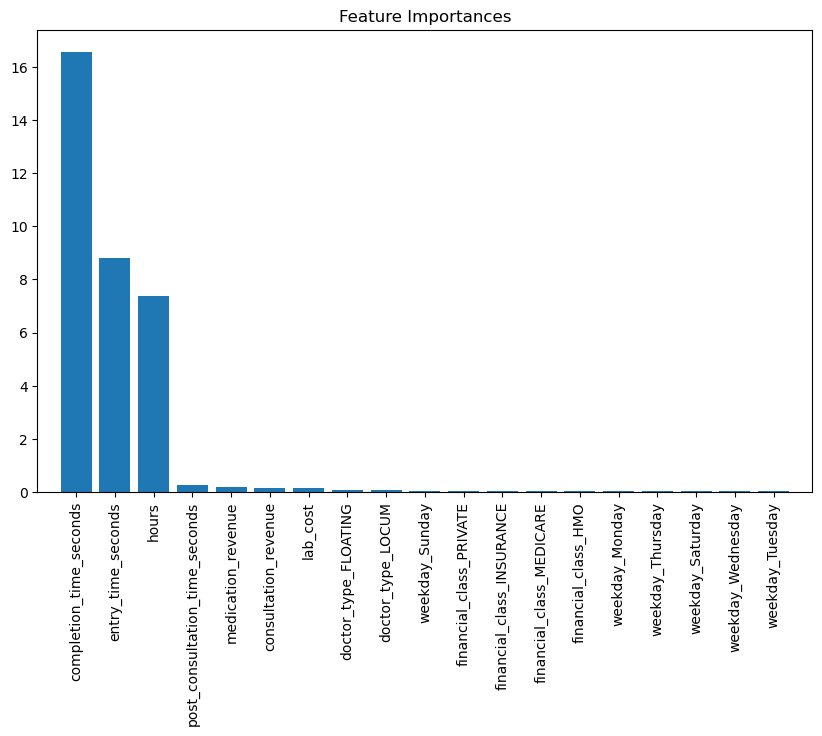

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt

# Sample creation of the df DataFrame for testing
data = {
    'date': pd.date_range(start='2019-11-01', periods=29998, freq='H'),
    'medication_revenue': np.random.choice(['1183.22', '738.48', '660', '600', '591.6', '$-'], 29998),
    'lab_cost': np.random.choice(['10', '$-', '28.04', '15', '48.15'], 29998),
    'consultation_revenue': np.random.choice(['20.17', '15', '21.17', '$-', '12'], 29998),
    'doctor_type': np.random.choice(['ANCHOR', 'LOCUM', 'FLOATING'], 29998),
    'financial_class': np.random.choice(['HMO', 'INSURANCE', 'MEDICARE', 'PRIVATE', 'CORPORATE'], 29998),
    'patient_type': ['OUTPATIENT'] * 29998,
    'entry_time': pd.to_timedelta(np.random.randint(0, 86400, size=29998), unit='s'),
    'post_consultation_time': pd.to_timedelta(np.random.randint(0, 86400, size=29998), unit='s'),
    'completion_time': pd.to_timedelta(np.random.randint(0, 86400, size=29998), unit='s'),
    'patient_id': ['C' + str(i) for i in range(10001, 39999)]
}
df = pd.DataFrame(data)

# Assuming you already have the following preprocessing steps:
df['medication_revenue'] = pd.to_numeric(df['medication_revenue'].replace('$-', '0').replace('$', '').str.strip())
df['lab_cost'] = pd.to_numeric(df['lab_cost'].replace('$-', '0').replace('$', '').str.strip())
df['consultation_revenue'] = pd.to_numeric(df['consultation_revenue'].replace('$-', '0').replace('$', '').str.strip())

# Add derived columns as described
df['waiting_time'] = df['completion_time'] - df['entry_time']
df['waiting_ber_munets'] = df['waiting_time'].dt.seconds / 60
df['waiting_ber_munets'] = df['waiting_ber_munets'].round(0)
df['weekday'] = df['date'].dt.strftime('%A')
df['hours'] = df['entry_time'].dt.components.hours

# Convert timedelta features to total seconds
df['entry_time_seconds'] = df['entry_time'].dt.total_seconds()
df['post_consultation_time_seconds'] = df['post_consultation_time'].dt.total_seconds()
df['completion_time_seconds'] = df['completion_time'].dt.total_seconds()

# Drop unnecessary columns
df = df.drop(columns=['patient_id', 'patient_type', 'entry_time', 'post_consultation_time', 'completion_time', 'waiting_time', 'date'])

# Encode categorical variables
df = pd.get_dummies(df, columns=['doctor_type', 'financial_class', 'weekday'], drop_first=True)

# Split the data
X = df.drop(columns=['waiting_ber_munets'])
y = df['waiting_ber_munets']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the individual models
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)
cat_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=10, l2_leaf_reg=5, random_state=42, silent=True)

# Fit the individual models
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
cat_model.fit(X_train, y_train)

# Define the meta-regressor
meta_regressor = LinearRegression()

# Combine models in a stacking regressor
stacking_model = StackingRegressor(
    estimators=[
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('cat', cat_model)
    ],
    final_estimator=meta_regressor
)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions with the stacking model
y_pred_train_stacking = stacking_model.predict(X_train)
y_pred_test_stacking = stacking_model.predict(X_test)

# Evaluate the stacking model
train_mse_stacking = mean_squared_error(y_train, y_pred_train_stacking)
test_mse_stacking = mean_squared_error(y_test, y_pred_test_stacking)
train_r2_stacking = r2_score(y_train, y_pred_train_stacking)
test_r2_stacking = r2_score(y_test, y_pred_test_stacking)
train_mae_stacking = mean_absolute_error(y_train, y_pred_train_stacking)
test_mae_stacking = mean_absolute_error(y_test, y_pred_test_stacking)

print(f'Stacking Train MSE: {train_mse_stacking}')
print(f'Stacking Test MSE: {test_mse_stacking}')
print(f'Stacking Train R2: {train_r2_stacking}')
print(f'Stacking Test R2: {test_r2_stacking}')
print(f'Stacking Train MAE: {train_mae_stacking}')
print(f'Stacking Test MAE: {test_mae_stacking}')

# Feature Importance - Average of feature importances from individual models
rf_importances = rf_model.feature_importances_
xgb_importances = xgb_model.feature_importances_
cat_importances = cat_model.get_feature_importance()

# Average the feature importances
importances = (rf_importances + xgb_importances + cat_importances) / 3
features = X.columns
indices = np.argsort(importances)[::-1]

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()
